# Analysis of KXIP vs DC


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()



In [2]:
# Loading the DataSets
data = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
data.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

# Removing duplicates

In [3]:
# Check for Duplicate Rows 
duplicated1=data.duplicated()
duplicated2=deliveries.duplicated()
deliveries.drop_duplicates(inplace=True)
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
# Check for Data Set Deliveries
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [5]:
# Check the Shape of both the CSV files

print('Rows and columns of Matches Data Set is',data.shape)
print('Rows and columns of Deliveries Data Set is',deliveries.shape)


Rows and columns of Matches Data Set is (756, 18)
Rows and columns of Deliveries Data Set is (179055, 21)


In [6]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
#Chek for Delivery info
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [8]:
# Make Delhi Daredevlis and Delhi Capitals Merge as Delhi Capitals
data.replace(to_replace = ['Delhi Daredevils']   , value = ['Delhi Capitals' ] , inplace = True)
deliveries.replace(to_replace = ['Delhi Daredevils'  ] , value = ['Delhi Capitals'], inplace = True)

In [9]:
# Check for Missing Values for Matches
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
# Check for Columns Where there is NULL Values first Check Winner there are 4 Rows as there is no Result we will put NUll values to 0
data[data['winner'].isnull()]
data['winner'].fillna('NoWinner', inplace=True)

In [11]:
# Check for Player_of_match as there is no Result put NULL values as NoPlayerMatch
data[data['player_of_match'].isnull()]
data['player_of_match'].fillna('NoPlayerMatch', inplace=True)

In [12]:
# Check for City there are 7 NULL values as City doest have significance for Analysis we will replace Null values to Unknow
data[data['city'].isnull()]
data['city'].fillna('Unknown', inplace=True)

In [13]:
# Check for Umpire 1 & Umpire 2 -- Putting Null value to some Umpire as this doesnt have significance
data['umpire1'].fillna('Unknown', inplace=True)
data['umpire2'].fillna('Unknown', inplace=True)

In [14]:
# Umpire 3 has 637 Null Values and doesnt have much signifiance we will Drop this Columns from Dataframe
data=data.drop(['umpire3'],axis=1)


In [15]:
# Check for matches if there is any NULL values Remaining
data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [16]:
# Check for Missing values for Deliveries
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

In [17]:
# For More Analysis ,let us Merge these two Dataframe
# Check for Any Null Values
data_merge=pd.merge(data,deliveries,left_on='id',right_on='match_id',how='inner')
data_merge.isnull().sum()

id                       0
season                   0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                   0
win_by_runs              0
win_by_wickets           0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
f

# For Deliveries Dataframe we have NULL values for Player_dismissed,dismissial_kind,fielder as these can be remain intact as there is Wickets and player haven taken runs or it is a dot ball When Doing modelling we can considerd Null Values to replace some values

# Check for HeatMaps:
The Heat Map procedure shows the distribution of a quantitative variable over all combinations of 2 categorical factors. If one of the 2 factors represents time, then the evolution of the variable can be easily viewed using the map. A gradient color scale is used to represent the values of the quantitative variable. The correlation between two random variables is a number that runs from -1 through 0 to +1 and indicates a strong inverse relationship, no relationship, and a strong direct relationship, respectively.

<AxesSubplot:>

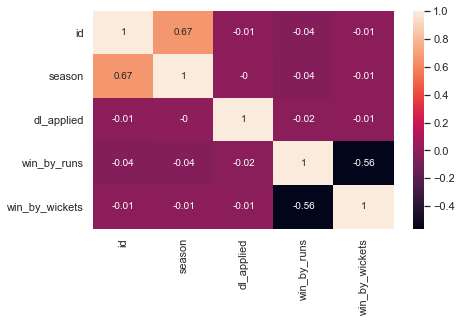

In [18]:
corelation_matrix=data.corr().round(2)
sns.heatmap(data=corelation_matrix,annot=True)

<AxesSubplot:>

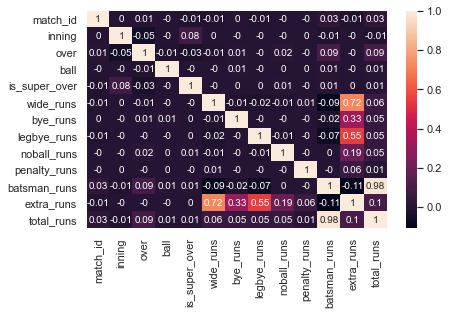

In [19]:
corelation_matrix=deliveries.corr().round(2)
sns.heatmap(data=corelation_matrix,annot=True)

# Wide_runs and extra_runs are highly corerealted ,When builiding Model we can remove one of the variable

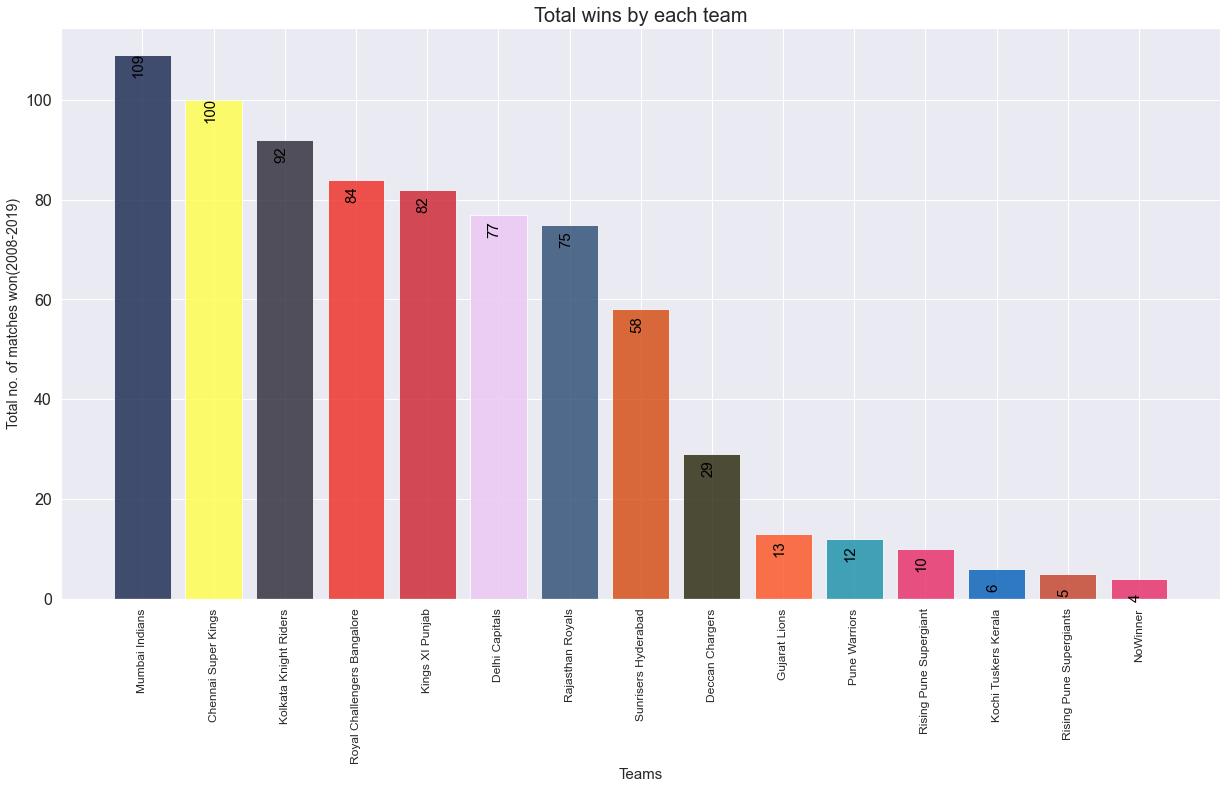

In [20]:
# Total no. of wins by each team
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

# MOM OF AWARDS

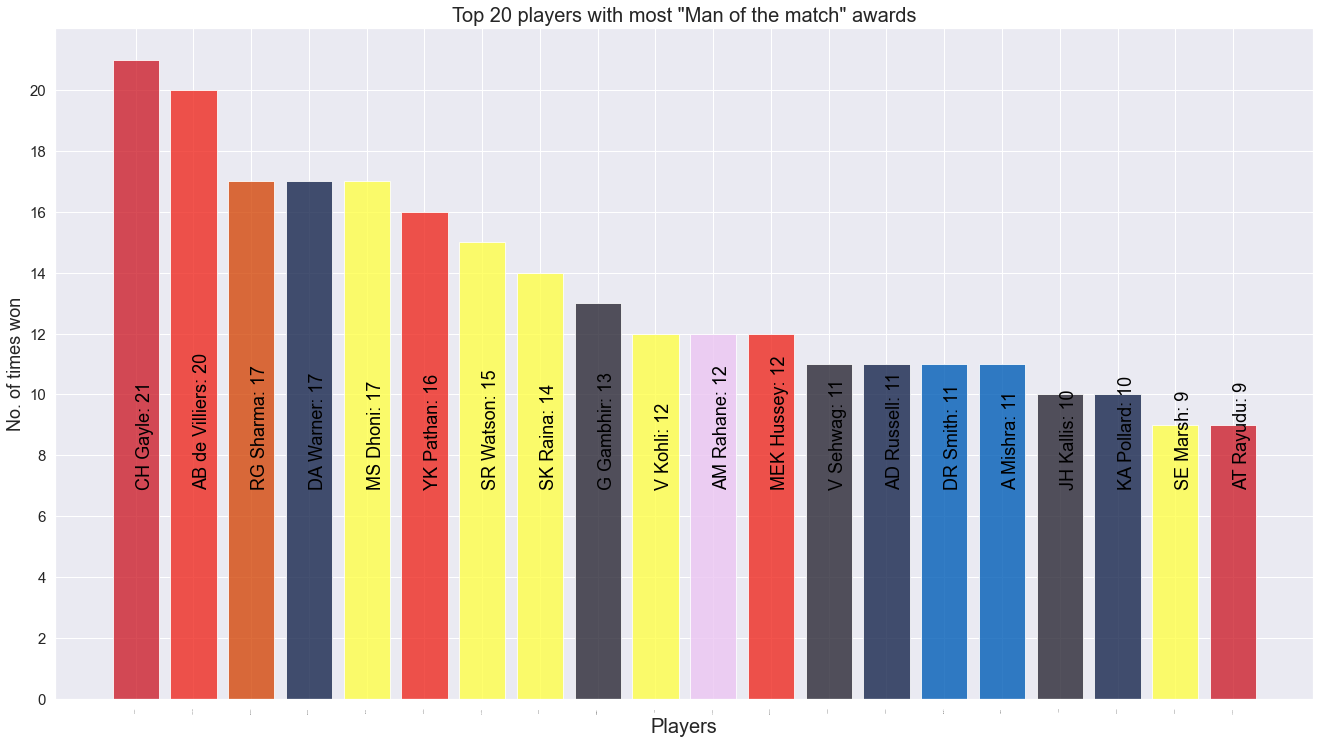

In [21]:
# Man of Match Awards
players=pd.DataFrame(data['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()


In [22]:
# Filter out Data for Punjab & DC 
pbrb=data[np.logical_or(np.logical_and(data['team1']=='Delhi Capitals',data['team2']=='Kings XI Punjab'),np.logical_and(data['team2']=='Delhi Capitals',data['team1']=='Kings XI Punjab'))]
# Combined for Punjab & MI
pbrb_d= deliveries[np.logical_or(np.logical_and(deliveries['batting_team']=='Delhi Capitals',deliveries['bowling_team']=='Kings XI Punjab'),np.logical_and(deliveries['bowling_team']=='Delhi Capitals',deliveries['batting_team']=='Kings XI Punjab'))]

In [23]:
# Check for any Duplicate Rows
duplicate = pbrb[pbrb.duplicated()]
duplicate
duplicate_D = pbrb_d[pbrb_d.duplicated()]
duplicate_D

Empty DataFrame
Columns: [match_id, inning, batting_team, bowling_team, over, ball, batsman, non_striker, bowler, is_super_over, wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs, batsman_runs, extra_runs, total_runs, player_dismissed, dismissal_kind, fielder]
Index: []

[0 rows x 21 columns]

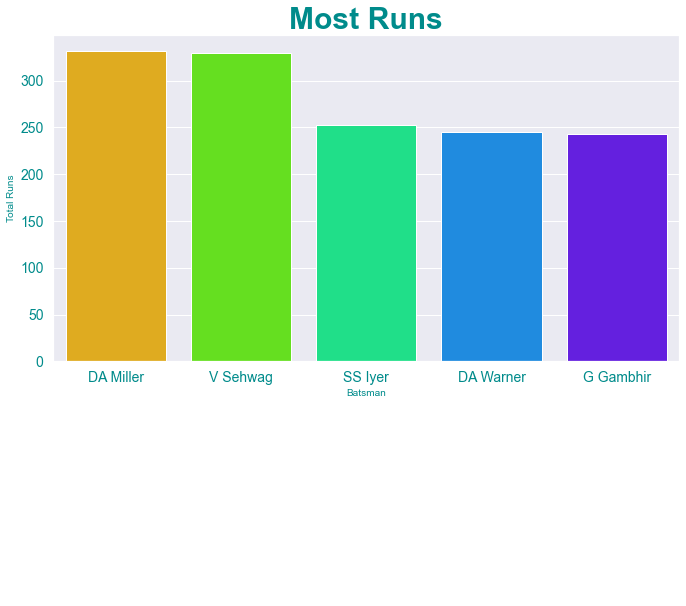

In [24]:
# Most Runs done by Players of both Teams 

#Create new dataframe
most_runs = pd.DataFrame()

#KKR_Runs=deliveries[(deliveries['bowling_team']=='Royal Challengers Bangalore') & (deliveries['batting_team']=='Kolkata Knight Riders') ]
# From the 'deliveries' dataframe groupby rows based off 'batsman' column, perform sum on them, fetch only 
# the 'batsman_runs' column, sort them and fetch top 10 results
most_runs['Total Runs'] = pbrb_d.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(5)

#Give a name to the index and reset the index to make it a column
most_runs.index.names = ['Batsman']
most_runs.reset_index(inplace=True)

#Plot the graph
plt.figure(figsize=(10,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Runs',fontdict=font)
ax = sns.barplot(x='Batsman',y='Total Runs',data = most_runs,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-500), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)

# Most Wickets Taken by Player from both the Teams

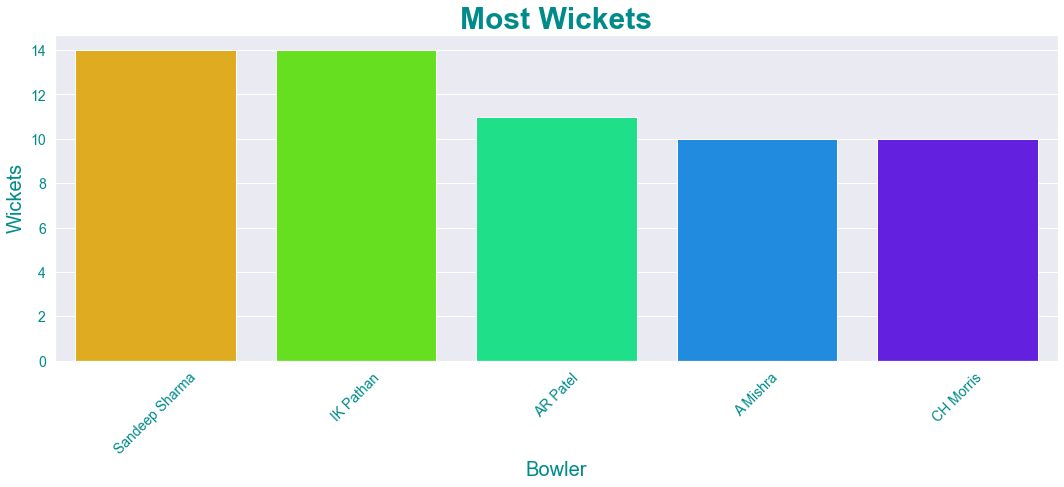

In [25]:
#the top Ten blower of 

#Create new dataframe
wickets = pd.DataFrame()
dismissal = pd.DataFrame()

dismissal = pbrb_d[(pbrb_d['player_dismissed'].notnull()) & (~pbrb_d['dismissal_kind'].isin(['run out','retired hurt','obstructing the field']))]
wickets['Wickets'] = dismissal.groupby('bowler').count()['player_dismissed'].sort_values(ascending=False).head(5)

#Give name to the index and reset the index to make it a column
wickets.index.names = ['Bowler']
wickets.reset_index(inplace=True)


#Plot the graph
plt.figure(figsize=(16,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Wickets',fontdict=font)
ax = sns.barplot(x='Bowler',y='Wickets',data = wickets,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)
plt.xticks(rotation=45)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-15), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)


# Head to Head between DC vs Punjab

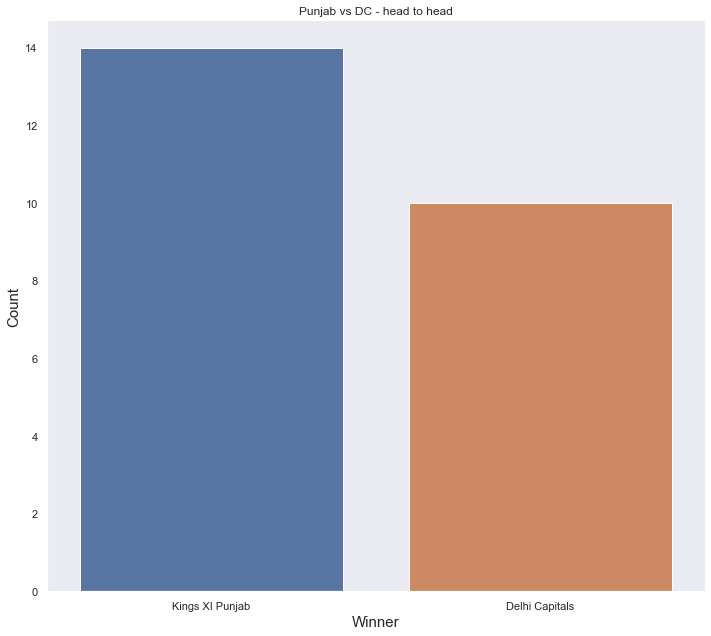

In [26]:
#  head to head
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10.5,10.5)
sns.countplot(pbrb['winner'],order=pbrb['winner'].value_counts().index)
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
#plt.yticks(fontsize=0)
plt.title('Punjab vs DC - head to head')
plt.show()

In [27]:
def win_visu_by_toss(team_name):
    datas = data[(data['toss_winner']==team_name) & (data['winner']==team_name)]
    count = datas['toss_decision'].value_counts()
    win_bat = count['bat']/(count['field']+count['bat'])*100
    win_field = count['field']/(count['bat']+count['field'])*100
    print("field_count = "+ str(count['field']))
    print("bat_count = " + str(count['bat']))
    print("Win %age if fielding is choosen = " + str(win_field))
    print("Win %age if batting is choosen = " + str(win_bat))
    print()
    print()
    data1 = [['Fielding', win_field], ['Batting', win_bat]]
    data1 = pd.DataFrame (data1,columns=['Decision','Win_%age'])
    return(px.pie( data1 , values= 'Win_%age' , names='Decision', title='Win %age For '+ team_name + ' for toss decision',color_discrete_sequence=px.colors.sequential.Rainbow))

            

In [28]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Kings XI Punjab
field_count = 29
bat_count = 6
Win %age if fielding is choosen = 82.85714285714286
Win %age if batting is choosen = 17.142857142857142




In [29]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Delhi Capitals
field_count = 30
bat_count = 12
Win %age if fielding is choosen = 71.42857142857143
Win %age if batting is choosen = 28.57142857142857




# In Head to head KXIP chances of Winning is more then DC

# Will See that Matches are Placed Outside India ,So to Check what is Record of Winning the Match Outside India i.e UAE

In [30]:
data['venue'].nunique()

41

In [30]:
# Todays Match Played in Sharjah Stadium Will Check Hows Team Performed in this Stadium.
Venue =['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'M. A. Chidambaram Stadium', 'Feroz Shah Kotla Ground',
       'M. Chinnaswamy Stadium', 'Rajiv Gandhi Intl. Cricket Stadium',
       'IS Bindra Stadium', 'ACA-VDCA Stadium']

UAE_Winner=data.loc[(data['venue']=='Dubai International Cricket Stadium')]
UAE_Winner.groupby('winner').count()['result'].reset_index()


winner  result
0          Chennai Super Kings       2
1               Delhi Capitals       1
2              Kings XI Punjab       1
3  Royal Challengers Bangalore       1
4          Sunrisers Hyderabad       2

# In Dubai, DC & KXIP has equal chance of Winning the Match

In [54]:
#pbrb_d[pbrb_d['batsman'].str.contains('KL Rahul')].head(1)
KL_Rahul=pbrb_d[(pbrb_d['batsman']=='KL Rahul')& (pbrb_d['over'] < 6) ]
KL_Rahul['over'].unique()
# Only as per DF only 1 to 5 Overs he has batted against DC

array([1, 2, 3, 5, 4], dtype=int64)

# Strike Rate oF KL Rahul in first 6 Overs

In [46]:
# Strike Rate oF KL Rahul in first 6 Overs

#pbrb_d[pbrb_d['batsman'].str.contains('KL Rahul')].head(10)
# Name is KL Rahul
KL_Rahul_Runs= KL_Rahul.groupby('match_id').agg({'batsman_runs':'sum','ball':'count'}).reset_index()
S_Runs=KL_Rahul_Runs['batsman_runs'].sum()
S_Balls =KL_Rahul_Runs['ball'].sum()
Strike_Rate = S_Runs /  S_Balls
print('Strike Rate by KL Rahul against DC within 6 Overs', round((Strike_Rate)*100 ,2))

Strike Rate by KL Rahul against DC within 6 Overs 198.04


In [68]:
# Check for KL Rahul Runs at this Venue
KL_Rahul=data_merge[(data_merge['batsman']=='KL Rahul')&  (data_merge['venue']=='Dubai International Cricket Stadium') & (data_merge['over'] < 6)  ]
KL_Rahul_Runs= KL_Rahul.groupby('match_id').agg({'batsman_runs':'sum','ball':'count'}).reset_index()
S_Runs=KL_Rahul_Runs['batsman_runs'].sum()
S_Balls =KL_Rahul_Runs['ball'].sum()
Strike_Rate = S_Runs /  S_Balls
print('Strike Rate by KL Rahul against DC within 6 Overs', round((Strike_Rate)*100 ,2))

Strike Rate by KL Rahul against DC within 6 Overs 133.33


In [71]:
# Check against all Other Teams Excluding DC
teams_to_exclude =['Delhi Capitals']
SPDSmith=data_merge[(data_merge['batsman']=='KL Rahul') & (~data_merge['bowling_team'].isin(teams_to_exclude)) & (data_merge['over'] < 6)]
SPDSmith_Runs= SPDSmith.groupby('match_id').agg({'batsman_runs':'sum','ball':'count'}).reset_index()
S_Runs=SPDSmith_Runs['batsman_runs'].sum()
S_Balls =SPDSmith_Runs['ball'].sum()
Strike_Rate = S_Runs /  S_Balls
print('Strike Rate by KL RAHUL against Other teams Excluding DC', round((Strike_Rate)*100 ,2))

Strike Rate by KL RAHUL against Other teams Excluding DC 128.3


In [ ]:
# KL Rahul has more Average with DC as compared to Other Teams

In [80]:
# What will be Shreyas Iyers Contribution to DC's total Score?
# First Check total Runs by DC against different Matches 
# Then Check Individual Runs of Shreyas Iyers Contribution with in Individual match
# Then divide Total RUns made by DC by Shreyas Iyers Individual Runs against KXIP
# Checking the Name first
# We can See there are matches Where KL Rahul doesnt play ,we have to ignore the matches where KL Rahul doest not play 
# We have to Merge the DataFrame with Inner Join with match ID and then Calculate total/Runs and then get the Contribution
pbrb_d[pbrb_d['batsman'].str.contains('Iyer')].head(1)

match_id  inning    batting_team     bowling_team  over  ball  batsman  \
3364        15       1  Delhi Capitals  Kings XI Punjab     8     4  SS Iyer   

      non_striker    bowler  is_super_over  ...  bye_runs  legbye_runs  \
3364  SW Billings  VR Aaron              0  ...         0            0   

      noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
3364            0             0             0           1           1   

      player_dismissed dismissal_kind fielder  
3364               NaN            NaN     NaN  

[1 rows x 21 columns]

In [101]:
# Check for SS Iyer Individual runs against KXIP
S_Iyer=pbrb_d[(pbrb_d['batsman']=='SS Iyer') ]
S_Iyer= S_Iyer.groupby('match_id').agg({'batsman_runs':'sum'}).reset_index()
S_Iyer.head()

match_id  batsman_runs
0        15            22
1        35             6
2       528             6
3       548            54
4       583             3

In [100]:
# Check for Total Run against KXIP
S_Iyer_TR=pbrb_d[(pbrb_d['batting_team']=='Delhi Capitals')]
S_Iyer_RE= S_Iyer_TR.groupby('match_id').agg({'total_runs':'sum'}).reset_index()
S_Iyer_RE.head()

match_id  total_runs
0        15         188
1        35          67
2        73         158
3       100         118
4       120          58

# We can See there are matches Where KL Rahul doesnt play ,we have to ignore the matches where KL Rahul doest not play 
# We have to Merge the DataFrame with Inner Join with match ID and then Calculate total/Runs and then get the Contribution

In [114]:
#  Merge the Dataframe
import pandas as pd
df =pd.merge(S_Iyer,S_Iyer_RE,on="match_id",how="inner")
df['batsman_runs']
TR=df['total_runs'].sum()
BR=df['batsman_runs'].sum()
S_Iyer_Contribution = round(((BR)/(TR))*100 ,2)
print('Shreyas Iyers Contribution is',S_Iyer_Contribution)

Shreyas Iyers Contribution is 19.22


# So Shreays iyers Contribution is 19% against KXIP

In [ ]:
# Wickets Taken by KXIP excluding Shami from 31st Ball to 120th Ball 

In [115]:
pbrb_d[pbrb_d['batsman'].str.contains('Shami')].head(1)
# Name is Mohammed Shami

match_id  inning    batting_team     bowling_team  over  ball  \
8203        35       1  Delhi Capitals  Kings XI Punjab    16     6   

             batsman non_striker          bowler  is_super_over  ...  \
8203  Mohammed Shami    A Mishra  Sandeep Sharma              0  ...   

      bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
8203         0            0            0             0             1   

      extra_runs  total_runs  player_dismissed dismissal_kind fielder  
8203           0           1               NaN            NaN     NaN  

[1 rows x 21 columns]

In [135]:
Players_to_Exclude =['Mohammed Shami']
Shami=pbrb_d[(pbrb_d['bowling_team']=='Kings XI Punjab') & (~pbrb_d['bowler'].isin(Players_to_Exclude))]
Shami_E=Shami[(Shami['over'] >6) & (Shami['player_dismissed'].notnull())]
KXIP_wic=Shami_E.groupby('match_id').count()['player_dismissed'].reset_index()
print('Wickets taken by KXIP without Shami against DC is',round(np.mean(KXIP_wic['player_dismissed']),2))
print('Wickets taken by KXIP without Shami against DC median is',round(np.median(KXIP_wic['player_dismissed']),2))

Wickets taken by KXIP without Shami against DC is 4.7
Wickets taken by KXIP without Shami against DC median is 5.0


# Wickets taken by KXIP without Shami against DC is around 5

In [136]:
# What will be Status of Gayle during KXIP's Batting
# Check for Name 
pbrb_d[pbrb_d['batsman'].str.contains('Gayle')].head(1)
# Name is CH Gayle

match_id  inning     batting_team    bowling_team  over  ball  \
173499     11328       1  Kings XI Punjab  Delhi Capitals     1     2   

         batsman non_striker    bowler  is_super_over  ...  bye_runs  \
173499  CH Gayle    KL Rahul  I Sharma              0  ...         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
173499            0            0             0             1           0   

        total_runs  player_dismissed dismissal_kind fielder  
173499           1               NaN            NaN     NaN  

[1 rows x 21 columns]

In [137]:
# Filter using Name and then Group by Using MatchID with Aggregation for Sum & Count 
Gayle=pbrb_d[(pbrb_d['batsman']=='CH Gayle')]
Gayle_Runs= Gayle.groupby('match_id').agg({'batsman_runs':'sum','ball':'count'}).reset_index()
S_Runs=Gayle_Runs['batsman_runs'].sum()
S_Balls =Gayle_Runs['ball'].sum()
Strike_Rate = S_Runs /  S_Balls
print('Strike Rate by Gayle against DC ', round((Strike_Rate)*100 ,2))

Strike Rate by Gayle against DC  186.49


In [171]:
# Gayle has only played only 1 match against DC

# Strike Rate by Gayle against DC  186.49

In [151]:
# Check for Gayle whether he Remains out & Not out at the whole Innings
Gayle_Status=pbrb_d[(pbrb_d['batsman']=='CH Gayle')]
# Just as Player Dismissed as most NAN we will categories all NAN as NOTOUT
#Gayle_Status['dismissal_kind'].fillna('NotOut', inplace=True)
type(Gayle_Status)

pandas.core.frame.DataFrame

In [157]:
Gayle_Status['dismissal_kind'].fillna('NotOut', inplace=True)

In [173]:
Gayle_S=Gayle_Status.groupby(['match_id','dismissal_kind']).count().reset_index()
Gayle_Status=(~Gayle_S['dismissal_kind'].isin(['NotOut']))

0    True
1    True
Name: dismissal_kind, dtype: bool

# Gayle has played only 1 match against DC he is get Caught so there is high chances he will get out with SR of 180